In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

In [2]:
sns.set_theme()
pysqldf = lambda q: sqldf(q, globals())

## Read data

In [3]:
predictions = pd.read_json('data/predictions.json')
predictions.head()

,id,turn_id,answer
0,3dr23u6we5exclen4th8uq9rb42tel,1,white
1,3dr23u6we5exclen4th8uq9rb42tel,2,in a barn near a farm house
2,3dr23u6we5exclen4th8uq9rb42tel,3,no
3,3dr23u6we5exclen4th8uq9rb42tel,4,her mommy and 5 other sisters
4,3dr23u6we5exclen4th8uq9rb42tel,5,orange


In [4]:
failed = pd.read_csv('data/failed_predictions.csv')
failed.head()

,passage_id,turn_id,story_type,story,history QA,current question,gold_answers,failed_prediction,scores
0,3dr23u6we5exclen4th8uq9rb42tel,2,mctest,"Once upon a time, in a barn near a farm house,...","[{'input_text': 'What color was Cotton?', 'tur...","{'input_text': 'Where did she live?', 'turn_id...","['in a barn', 'in a barn', 'in a barn', 'in a ...",in a barn near a farm house,"{'em': 0.0, 'f1': 0.7053571428571428}"
1,3dr23u6we5exclen4th8uq9rb42tel,6,mctest,"Once upon a time, in a barn near a farm house,...","[{'input_text': 'What color was Cotton?', 'tur...",{'input_text': 'Was Cotton happy that she look...,"['no', 'no', 'No', 'no']",yes,"{'em': 0.0, 'f1': 0.0}"
2,3dr23u6we5exclen4th8uq9rb42tel,7,mctest,"Once upon a time, in a barn near a farm house,...","[{'input_text': 'What color was Cotton?', 'tur...",{'input_text': 'What did she do to try to make...,"['she painted herself', 'she painted herself',...",licked her face,"{'em': 0.0, 'f1': 0.0}"
3,3dr23u6we5exclen4th8uq9rb42tel,8,mctest,"Once upon a time, in a barn near a farm house,...","[{'input_text': 'What color was Cotton?', 'tur...","{'input_text': 'Whose paint was it?', 'turn_id...","['the farmer', ""the farmer's"", ""the old farmer...",old farmer 's orange paint,"{'em': 0.0, 'f1': 0.32142857142857145}"
4,3dr23u6we5exclen4th8uq9rb42tel,9,mctest,"Once upon a time, in a barn near a farm house,...","[{'input_text': 'What color was Cotton?', 'tur...","{'input_text': ""What did Cotton's mother and s...","['they started laughing', 'they started laughi...",started laughing,"{'em': 0.75, 'f1': 0.95}"


In [5]:
fully_failed = pd.read_csv('data/fully_failed_predictions.csv')
fully_failed.head()

,passage_id,turn_id,story_type,story,history QA,current question,gold_answers,failed_prediction,scores
0,3dr23u6we5exclen4th8uq9rb42tel,6,mctest,"Once upon a time, in a barn near a farm house,...","[{'input_text': 'What color was Cotton?', 'tur...",{'input_text': 'Was Cotton happy that she look...,"['no', 'no', 'No', 'no']",yes,"{'em': 0.0, 'f1': 0.0}"
1,3dr23u6we5exclen4th8uq9rb42tel,7,mctest,"Once upon a time, in a barn near a farm house,...","[{'input_text': 'What color was Cotton?', 'tur...",{'input_text': 'What did she do to try to make...,"['she painted herself', 'she painted herself',...",licked her face,"{'em': 0.0, 'f1': 0.0}"
2,3dr23u6we5exclen4th8uq9rb42tel,12,mctest,"Once upon a time, in a barn near a farm house,...","[{'input_text': 'What color was Cotton?', 'tur...",{'input_text': 'Did they want Cotton to change...,"['no', 'no', 'No', 'no']",yes,"{'em': 0.0, 'f1': 0.0}"
3,3azhrg4cu4ktme1zh7c2ro3pn2430d,2,mctest,Once there was a beautiful fish named Asta. As...,[{'input_text': 'what was the name of the fish...,{'input_text': 'What looked like a birds belly...,"['a bottle', 'a bottle', 'the bottle', 'a bott...",It looks like a bird 's belly,"{'em': 0.0, 'f1': 0.0}"
4,3azhrg4cu4ktme1zh7c2ro3pn2430d,7,mctest,Once there was a beautiful fish named Asta. As...,[{'input_text': 'what was the name of the fish...,{'input_text': 'Did a little boy write the not...,"['No', 'no', 'no', 'no']",yes,"{'em': 0.0, 'f1': 0.0}"


In [6]:
len(predictions), len(failed), len(fully_failed)

(7983, 3266, 1328)

## Clean data

In [7]:
correct = pysqldf("""SELECT id AS passage_id, p.turn_id AS turn, answer, "correct" AS correctness FROM predictions p
LEFT JOIN failed f ON p.id = f.passage_id AND p.turn_id = f.turn_id
WHERE scores IS NULL""")
correct

,passage_id,turn,answer,correctness
0,3dr23u6we5exclen4th8uq9rb42tel,1,white,correct
1,3dr23u6we5exclen4th8uq9rb42tel,3,no,correct
2,3dr23u6we5exclen4th8uq9rb42tel,4,her mommy and 5 other sisters,correct
3,3dr23u6we5exclen4th8uq9rb42tel,5,orange,correct
4,3dr23u6we5exclen4th8uq9rb42tel,11,licked her face,correct
...,...,...,...,...
4712,3ixqg4fa2tygl3tpwwa12i2uf58b90,5,yes,correct
4713,3ixqg4fa2tygl3tpwwa12i2uf58b90,6,yes,correct
4714,3ixqg4fa2tygl3tpwwa12i2uf58b90,7,yes,correct
4715,3ixqg4fa2tygl3tpwwa12i2uf58b90,9,Nevada,correct


In [8]:
partial = pysqldf("""SELECT passage_id, turn_id AS turn, failed_prediction AS answer, "partial" AS correctness FROM (
    SELECT * FROM failed EXCEPT SELECT * FROM fully_failed
)""")
partial

,passage_id,turn,answer,correctness
0,3018q3zvoiqh6tkjkzarysii2vbarg,3,new Cuba policy,partial
1,3018q3zvoiqh6tkjkzarysii2vbarg,10,harder it becomes to do that,partial
2,3018q3zvoiqh6tkjkzarysii2vbarg,12,financial resources,partial
3,30bxrybrp4x1oc9jpzup2dd38bdhwb,4,George Washington,partial
4,30bxrybrp4x1oc9jpzup2dd38bdhwb,11,in the Mycology and Plant Disease Survey of th...,partial
...,...,...,...,...
1933,3zy8ke4isj31mg8hifcnppmqssxvq7,5,the four - time World Player of the Year,partial
1934,3zy8ke4isj31mg8hifcnppmqssxvq7,7,see him remain as most highly - paid,partial
1935,3zy8ke4isj31mg8hifcnppmqssxvq7,10,after Sandro Rosell 's resignation,partial
1936,3zy8ke4isj31mg8hifcnppmqssxvq7,12,youth system,partial


In [9]:
incorrect = pysqldf("""SELECT passage_id, turn_id AS turn, failed_prediction AS answer, "incorrect" AS correctness
FROM fully_failed""")
incorrect

,passage_id,turn,answer,correctness
0,3dr23u6we5exclen4th8uq9rb42tel,6,yes,incorrect
1,3dr23u6we5exclen4th8uq9rb42tel,7,licked her face,incorrect
2,3dr23u6we5exclen4th8uq9rb42tel,12,yes,incorrect
3,3azhrg4cu4ktme1zh7c2ro3pn2430d,2,It looks like a bird 's belly,incorrect
4,3azhrg4cu4ktme1zh7c2ro3pn2430d,7,yes,incorrect
...,...,...,...,...
1323,3o7l7bfshep737ycahi4gj7i1qleiv,13,ISO 16,incorrect
1324,3i02618ya06g9pi2dcnttyux9nopu3,17,yes,incorrect
1325,3i02618ya06g9pi2dcnttyux9nopu3,19,ran off to the general store,incorrect
1326,3ixqg4fa2tygl3tpwwa12i2uf58b90,3,yes,incorrect


In [10]:
combined = pysqldf("SELECT * FROM correct UNION SELECT * FROM partial UNION SELECT * FROM incorrect")
combined

,passage_id,turn,answer,correctness
0,3018q3zvoiqh6tkjkzarysii2vbarg,1,running for president,correct
1,3018q3zvoiqh6tkjkzarysii2vbarg,2,yes,correct
2,3018q3zvoiqh6tkjkzarysii2vbarg,3,new Cuba policy,partial
3,3018q3zvoiqh6tkjkzarysii2vbarg,4,Mitt Romney and Jeb Bush,incorrect
4,3018q3zvoiqh6tkjkzarysii2vbarg,5,Mitt Romney and Jeb Bush,correct
...,...,...,...,...
7978,3zy8ke4isj31mg8hifcnppmqssxvq7,16,three,correct
7979,3zy8ke4isj31mg8hifcnppmqssxvq7,17,after a Spanish judge 's decision to investiga...,partial
7980,3zy8ke4isj31mg8hifcnppmqssxvq7,18,$ 78 million,correct
7981,3zy8ke4isj31mg8hifcnppmqssxvq7,19,no,correct


In [11]:
max(combined['turn'])

25

In [12]:
sum(combined.turn == 20), sum(combined.turn == 21)

(185, 11)

## Distributions of correctness

In [13]:
counts = pysqldf("""SELECT turn, COUNT(*) AS all_count FROM combined WHERE turn <= 20 GROUP BY turn""")
counts.head()

,turn,all_count
0,1,500
1,2,500
2,3,500
3,4,500
4,5,500


In [56]:
turn_acc = pysqldf("""SELECT turn, correctness,
CAST(count AS float) * 100/all_count AS percent FROM (
    SELECT turn, correctness, COUNT(*) AS count FROM combined
    WHERE turn <= 20 GROUP BY turn, correctness
) JOIN counts USING(turn)""")
turn_acc.head()

,turn,correctness,percent
0,1,correct,68.8
1,1,incorrect,10.4
2,1,partial,20.8
3,2,correct,61.4
4,2,incorrect,15.2


In [39]:
# Hack - multiply rows percent times to use histogram later
hist_turn_acc = turn_acc.loc[turn_acc.index.repeat(turn_acc.percent)]
hist_turn_acc = hist_turn_acc.reset_index(drop=True)
hist_turn_acc

,turn,correctness,percent
0,1,correct,69
1,1,correct,69
2,1,correct,69
3,1,correct,69
4,1,correct,69
...,...,...,...
1993,20,partial,24
1994,20,partial,24
1995,20,partial,24
1996,20,partial,24


[]

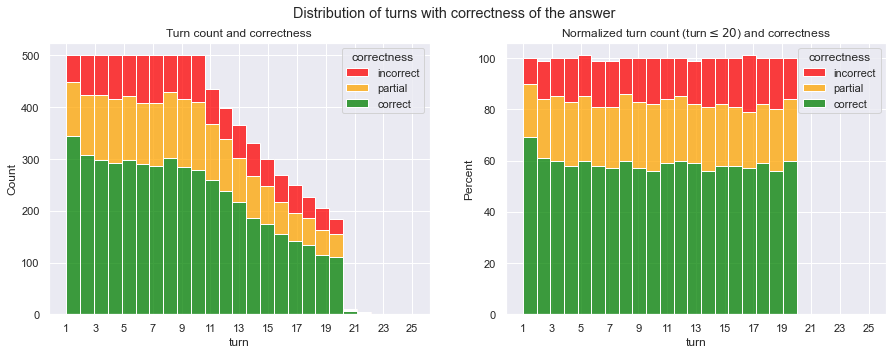

In [17]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Distribution of turns with correctness of the answer')
axes[0].set_title('Turn count and correctness')
axes[1].set_title('Normalized turn count (turn$\leq20$) and correctness')
p1 = sns.histplot(
    combined,
    ax=axes[0],
    x="turn", hue="correctness",
    multiple="stack",
    bins=25,
    hue_order=['incorrect', 'partial', 'correct'],
    palette=['red', 'orange', 'green']
)
p1.set_xticks(range(1, 26, 2))
p2 = sns.histplot(
    hist_turn_acc,
    ax=axes[1],
    x="turn", hue="correctness",
    multiple="stack",
    bins=20,
    hue_order=['incorrect', 'partial', 'correct'],
    palette=['red', 'orange', 'green']
)
p2.set_ylabel('Percent')
plt.plot()

**Conclusion:** There is a clear loss between the first turn and next ones (~10%). However, between the turns 2-20 there is no substantial difference between correctness distributions.

For publication:

[]

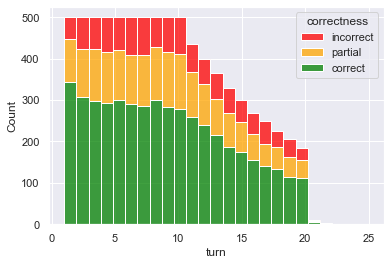

In [41]:
sns.histplot(
    combined,
    x="turn", hue="correctness",
    multiple="stack",
    bins=25,
    hue_order=['incorrect', 'partial', 'correct'],
    palette=['red', 'orange', 'green']
)
plt.plot()

[]

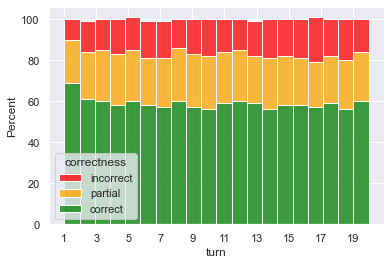

In [40]:
p = sns.histplot(
    hist_turn_acc,
    x="turn", hue="correctness",
    multiple="stack",
    bins=20,
    hue_order=['incorrect', 'partial', 'correct'],
    palette=['red', 'orange', 'green']
)
p.set_ylabel('Percent')
p.set_xticks(range(1, 21, 2))
plt.plot()

In [57]:
turn_acc[(turn_acc['turn'] == 1) & (turn_acc['correctness'] == 'correct')]

,turn,correctness,percent
0,1,correct,68.8


In [58]:
list(turn_acc[(turn_acc['turn'] >= 2) & (turn_acc['correctness'] == 'correct')]['percent'])

[61.4,
 59.6,
 58.4,
 59.8,
 58.2,
 57.2,
 60.2,
 56.8,
 55.6,
 59.403669724770644,
 59.899749373433586,
 59.01639344262295,
 56.36363636363637,
 58.0,
 57.62081784386617,
 56.626506024096386,
 58.849557522123895,
 55.609756097560975,
 60.0]

In [59]:
turn_acc[(turn_acc['turn'] == 1) & (turn_acc['correctness'] == 'incorrect')]

,turn,correctness,percent
1,1,incorrect,10.4


In [60]:
list(turn_acc[(turn_acc['turn'] >= 2) & (turn_acc['correctness'] == 'incorrect')]['percent'])

[15.2,
 15.2,
 17.0,
 15.6,
 18.4,
 18.4,
 14.2,
 16.8,
 18.0,
 15.825688073394495,
 15.037593984962406,
 17.48633879781421,
 18.78787878787879,
 17.666666666666668,
 19.33085501858736,
 21.686746987951807,
 17.699115044247787,
 20.48780487804878,
 16.216216216216218]

## Correctness for yes/no questions

In [176]:
turn1 = combined[combined['turn'] == 1]

In [88]:
turn2 = combined[combined['turn'] >= 2]

In [89]:
yesno = turn2[turn2['answer'].isin(['yes', 'no'])]
other = turn2[~turn2['answer'].isin(['yes', 'no'])]

In [90]:
pysqldf("""SELECT * FROM (
    SELECT correctness, ROUND(CAST(COUNT(*) AS float)/(SELECT COUNT(*) FROM yesno),2) AS "yes/no"
    FROM yesno
    GROUP BY correctness
)
JOIN (
    SELECT correctness, ROUND(CAST(COUNT(*) AS float)/(SELECT COUNT(*) FROM other),2) AS other
    FROM other
    GROUP BY correctness
) USING(correctness)
ORDER BY other DESC""")

,correctness,yes/no,other
0,correct,0.74,0.54
1,partial,0.03,0.31
2,incorrect,0.23,0.15


## Correctness and number of words in the answer

In [91]:
words = turn2.copy(deep=True)
words['answer'] = words['answer'].map(lambda x: len(x.split()))
words.head()

,passage_id,turn,answer,correctness
1,3018q3zvoiqh6tkjkzarysii2vbarg,2,1,correct
2,3018q3zvoiqh6tkjkzarysii2vbarg,3,3,partial
3,3018q3zvoiqh6tkjkzarysii2vbarg,4,5,incorrect
4,3018q3zvoiqh6tkjkzarysii2vbarg,5,5,correct
5,3018q3zvoiqh6tkjkzarysii2vbarg,6,1,correct


In [92]:
pysqldf("""SELECT answer AS "num of words",
COUNT(*) AS count,
ROUND(CAST(SUM(correctness='correct') AS float)/COUNT(*), 2) AS correct,
ROUND(CAST(SUM(correctness='partial') AS float)/COUNT(*), 2) AS partial,
ROUND(CAST(SUM(correctness='incorrect') AS float)/COUNT(*), 2) AS incorrect
FROM words WHERE answer <=10 GROUP BY answer""")

,num of words,count,correct,partial,incorrect
0,1,3518,0.70,0.08,0.22
1,2,1360,0.66,0.21,0.13
2,3,880,0.56,0.29,0.14
3,4,511,0.45,0.46,0.09
4,5,326,0.37,0.51,0.13
5,6,227,0.34,0.56,0.10
6,7,138,0.26,0.61,0.13
7,8,114,0.21,0.66,0.13
8,9,91,0.26,0.59,0.14
9,10,46,0.15,0.74,0.11


## Single word answers fail

In [104]:
from collections import Counter as c

In [116]:
words = turn2.copy(deep=True)
incorrect_words = list(words[(words['answer'].map(lambda x: len(x.split()) == 1)) & (words['correctness']=='incorrect')]['answer'])

In [117]:
len([x for x in incorrect_words if x in ['yes', 'no']])/len(incorrect_words)

0.5076923076923077

In [145]:
# set(incorrect_words)

In [114]:
words = turn2.copy(deep=True)
incorrect_words = list(words[(words['answer'].map(lambda x: len(x.split()) == 1)) & (words['correctness']=='correct')]['answer'])

In [115]:
len([x for x in incorrect_words if x in ['yes', 'no']])/len(incorrect_words)

0.5189873417721519

## Different catogries of data

In [161]:
from collections import defaultdict

In [169]:
with open('coqa-dev-v1.0.json') as f:
    a = json.load(f)
res = []
for b in a['data']:
    res.append((b['source'], b['id']))

data_groups = pd.DataFrame(res)
data_groups.rename(columns = {0:'type', 1:'passage_id'}, inplace = True)
data_groups

,type,passage_id
0,mctest,3dr23u6we5exclen4th8uq9rb42tel
1,mctest,3azhrg4cu4ktme1zh7c2ro3pn2430d
2,race,3ioen3p9s7jsqm9zwse0cwyj3kq612
3,cnn,36v4q8r5zk0iwte84nbw2t3d0qzqmg
4,mctest,3a1pq49wvhh8nbtgsb549nn9bzth12
...,...,...
495,race,3npfyt4izc42dgjyfy8tjwf92engxn
496,mctest,3a7y0r2p2ooc4i9zn4twg97pt7fjx6
497,wikipedia,3o7l7bfshep737ycahi4gj7i1qleiv
498,race,3i02618ya06g9pi2dcnttyux9nopu3


In [182]:
pysqldf("""SELECT type,
AVG(correctness='incorrect') AS incorrect,
AVG(correctness='correct') AS correct,
COUNT(*)
FROM turn2 JOIN data_groups USING(passage_id) GROUP BY type""")

,type,incorrect,correct,COUNT(*)
0,cnn,0.154293,0.597159,1549
1,gutenberg,0.190850,0.557516,1530
2,mctest,0.175094,0.575094,1325
3,race,0.195106,0.558918,1553
4,wikipedia,0.137615,0.632372,1526


In [183]:
pysqldf("""SELECT type,
AVG(correctness='incorrect') AS incorrect,
AVG(correctness='correct') AS correct,
COUNT(*)
FROM turn1 JOIN data_groups USING(passage_id) GROUP BY type""")

,type,incorrect,correct,COUNT(*)
0,cnn,0.08,0.73,100
1,gutenberg,0.19,0.60,100
2,mctest,0.10,0.72,100
3,race,0.10,0.64,100
4,wikipedia,0.05,0.75,100


In [184]:
pysqldf("""SELECT type,
AVG(correctness='incorrect') AS incorrect,
AVG(correctness='correct') AS correct,
COUNT(*)
FROM turn1 JOIN data_groups USING(passage_id) GROUP BY type""")

,type,incorrect,correct,COUNT(*)
0,cnn,0.08,0.73,100
1,gutenberg,0.19,0.60,100
2,mctest,0.10,0.72,100
3,race,0.10,0.64,100
4,wikipedia,0.05,0.75,100


## Limitations of the dataset

In [29]:
first = failed[failed.index==0]

In [30]:
first['story'][0]

'Once upon a time, in a barn near a farm house, there lived a little white kitten named Cotton. Cotton lived high up in a nice warm place above the barn where all of the farmer\'s horses slept. But Cotton wasn\'t alone in her little home above the barn, oh no. She shared her hay bed with her mommy and 5 other sisters. All of her sisters were cute and fluffy, like Cotton. But she was the only white one in the bunch. The rest of her sisters were all orange with beautiful white tiger stripes like Cotton\'s mommy. Being different made Cotton quite sad. She often wished she looked like the rest of her family. So one day, when Cotton found a can of the old farmer\'s orange paint, she used it to paint herself like them. When her mommy and sisters found her they started laughing. \n\n"What are you doing, Cotton?!" \n\n"I only wanted to be more like you". \n\nCotton\'s mommy rubbed her face on Cotton\'s and said "Oh Cotton, but your fur is so pretty and special, like you. We would never want yo

In [31]:
first['gold_answers'][0]

"['in a barn', 'in a barn', 'in a barn', 'in a barn near']"

In [32]:
first['failed_prediction'][0]

'in a barn near a farm house'

In [33]:
first['scores'][0]

"{'em': 0.0, 'f1': 0.7053571428571428}"

In [125]:
import json

In [134]:
a(failed['scores'][0])

{'em': 0.0, 'f1': 0.7053571428571428}

In [212]:
a = lambda x: json.loads(x.replace("'", '"'))['em'] == 0 and json.loads(x.replace("'", '"'))['f1'] == 0

In [216]:
b = failed[failed['scores'].map(a)]
b[b['story_type'] == 'gutenberg'].head(50)

,passage_id,turn_id,story_type,story,history QA,current question,gold_answers,failed_prediction,scores
95,3w2lolrxlbfni6t5wqngs6le78akrc,5,gutenberg,"CHAPTER XXII \n\nNorthward, along the leeward ...",[{'input_text': 'What worked her way northward...,"{'input_text': 'Did he have red hair?', 'turn_...","['No', 'No.', 'No', 'no']",yes,"{'em': 0.0, 'f1': 0.0}"
97,3w2lolrxlbfni6t5wqngs6le78akrc,8,gutenberg,"CHAPTER XXII \n\nNorthward, along the leeward ...",[{'input_text': 'What worked her way northward...,{'input_text': 'Who argued to Villa that he mu...,"['Harley Kennan', 'Harley Kennan.', 'Harley', ...",Haggin,"{'em': 0.0, 'f1': 0.0}"
99,3w2lolrxlbfni6t5wqngs6le78akrc,12,gutenberg,"CHAPTER XXII \n\nNorthward, along the leeward ...",[{'input_text': 'What worked her way northward...,{'input_text': 'Who was the husband she retort...,"['Harley Kennan', 'Harley Kennan.', 'Harley', ...",Villa,"{'em': 0.0, 'f1': 0.0}"
100,3w2lolrxlbfni6t5wqngs6le78akrc,17,gutenberg,"CHAPTER XXII \n\nNorthward, along the leeward ...",[{'input_text': 'What worked her way northward...,{'input_text': 'Did she ask Villa to think of ...,"['No', 'No.', 'No', 'no']",yes,"{'em': 0.0, 'f1': 0.0}"
133,3txd01zld4hukwwjfsv5q0j2ixa4ul,4,gutenberg,CHAPTER FIFTY FIVE. \n\nWAITING. \n\nThe lengt...,"[{'input_text': 'Who was excommunicated?', 'tu...",{'input_text': 'Why was he excommunicated then...,"['unknown', 'For the energy with which he soug...",spreading Plague,"{'em': 0.0, 'f1': 0.0}"
134,3txd01zld4hukwwjfsv5q0j2ixa4ul,5,gutenberg,CHAPTER FIFTY FIVE. \n\nWAITING. \n\nThe lengt...,"[{'input_text': 'Who was excommunicated?', 'tu...",{'input_text': 'Who was inspired by this man?'...,"['Romola', 'Romola', 'Romola', 'Romola']",Savonarola,"{'em': 0.0, 'f1': 0.0}"
184,3z3zlgnnsiuha76yy56h6uu71bh3q1,11,gutenberg,Chapter XVIII \n\nThe Hound Restored \n\nOn th...,"[{'input_text': 'To whom did Archie pray?', 't...",{'input_text': 'Was Archie eager or reluctant ...,"['Reluctant', 'Reluctant', 'Reluctant', 'Reluc...",Reluctantly,"{'em': 0.0, 'f1': 0.0}"
185,3z3zlgnnsiuha76yy56h6uu71bh3q1,14,gutenberg,Chapter XVIII \n\nThe Hound Restored \n\nOn th...,"[{'input_text': 'To whom did Archie pray?', 't...",{'input_text': 'Would he try to escape on a tr...,"['No', 'No', 'no', 'no']",yes,"{'em': 0.0, 'f1': 0.0}"
187,3z3zlgnnsiuha76yy56h6uu71bh3q1,18,gutenberg,Chapter XVIII \n\nThe Hound Restored \n\nOn th...,"[{'input_text': 'To whom did Archie pray?', 't...",{'input_text': 'What did Hector become excited...,"['The hut', 'the hut', 'reaching the hut', 'th...","He sniffed here and there , eagerly hunted up ...","{'em': 0.0, 'f1': 0.0}"
202,3rwe2m8qwha0qiu9zqwh021vtpv0n3,9,gutenberg,Chapter 17: The Battle Of Moncontor. \n\nWhen ...,"[{'input_text': 'Who was eating?', 'turn_id': ...",{'input_text': 'Did he intend to stay there at...,"['yes', 'Yes', 'yes', 'yes']",no,"{'em': 0.0, 'f1': 0.0}"


In [208]:
c = b[b.index == 98]
c

,passage_id,turn_id,story_type,story,history QA,current question,gold_answers,failed_prediction,scores
98,3w2lolrxlbfni6t5wqngs6le78akrc,11,gutenberg,"CHAPTER XXII \n\nNorthward, along the leeward ...",[{'input_text': 'What worked her way northward...,{'input_text': 'How long must he be nameless u...,"['Until they get back to Tulagi', 'Until they ...",until we get back to Tulagi and find out his r...,"{'em': 0.0, 'f1': 0.9465579710144928}"


In [209]:
print(c['gold_answers'][98])

['Until they get back to Tulagi', 'Until they get back to Tulagi and find out his real name.', 'Until they find his name', 'we get back to Tulagi and find out his real name.']


In [210]:
print(c['failed_prediction'][98])

until we get back to Tulagi and find out his real name
